

>  Develop models capable of accurately predicting the crime categories based on this information.



# Imports

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(10)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
5,300 N AVENUE 57,NaN,34.1127,-118.1942,01/10/2020 12:00:00 AM,01/10/2020 12:00:00 AM,256.0,11.0,Northeast,1118.0,...,50.0,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,Violent Crimes
6,1600 N SOTO ST,NaN,34.0623,-118.1980,08/17/2020 12:00:00 AM,08/17/2020 12:00:00 AM,1840.0,4.0,Hollenbeck,448.0,...,0.0,X,X,202.0,LIQUOR STORE,NaN,NaN,IC,Invest Cont,Property Crimes
7,12600 BRADDOCK DR,NaN,33.9864,-118.4239,10/07/2021 12:00:00 AM,03/19/2020 12:00:00 AM,1100.0,14.0,Pacific,1455.0,...,68.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,Property Crimes
8,5500 COLDWATER CA AV,NaN,34.1781,-118.4179,01/28/2020 12:00:00 AM,01/26/2020 12:00:00 AM,1600.0,9.0,Van Nuys,939.0,...,0.0,NaN,NaN,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,Property Crimes
9,11500 AVIATION BL,NaN,33.9298,-118.3784,07/07/2020 12:00:00 AM,07/07/2020 12:00:00 AM,445.0,14.0,Pacific,1499.0,...,22.0,F,H,108.0,PARKING LOT,NaN,NaN,AA,Adult Arrest,Property Crimes


# Data Exploration And Preprocessing

In [ ]:
df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')


Columns information:
1. Location: Location of the incident.
2. Cross_Street: Cross street near the incident.
3. Latitude: Latitude coordinate.
4. Longitude: Longitude coordinate.
5. Date_Reported: Date when the crime was reported.
6. Date_Occurred: Date when the crime occurred.
7. Time_Occurred: Time when the crime occurred.
8. Area_ID: ID of the area where the crime occurred.
9. Area_Name: Name of the area where the crime occurred.
10. Reporting_District_no: Reporting district number.
11. Part 1-2: Part classification of the crime (1 or 2).
12. Modus_Operandi: Method of operation used in the crime.
13. Victim_Age: Age of the victim.
14. Victim_Sex: Sex of the victim.
15. Victim_Descent: Descent of the victim.
16. Premise_Code: Code representing the type of premise where the crime occurred.
17.Premise_Description: Description of the premise.
18.Weapon_Used_Code: Code of the weapon used.
19. Weapon_Description: Description of the weapon used.
20.Status: Status of the investigation.
21. Status_Description: Description of the status.
22. Crime_Category: Category of the crime (target variable).

IC: "Invest Cont" (Likely "Investigation Continuing")
AO: "Adult Other"

AA: "Adult Arrest
JA: Possibly "Juvenile Arrest"

JO: Possibly "Juvenile Other"

In [ ]:
df['Status'].unique()

array(['IC', 'AO', 'AA', 'JA', 'JO'], dtype=object)

In [ ]:
df['Status_Description'].unique()

array(['Invest Cont', 'Adult Other', 'Adult Arrest', 'Juv Arrest',
       'Juv Other'], dtype=object)

In [ ]:
# Getting basic information about the dataset
print("\nDataset Information:")
df.info()

# numerical columns info
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non

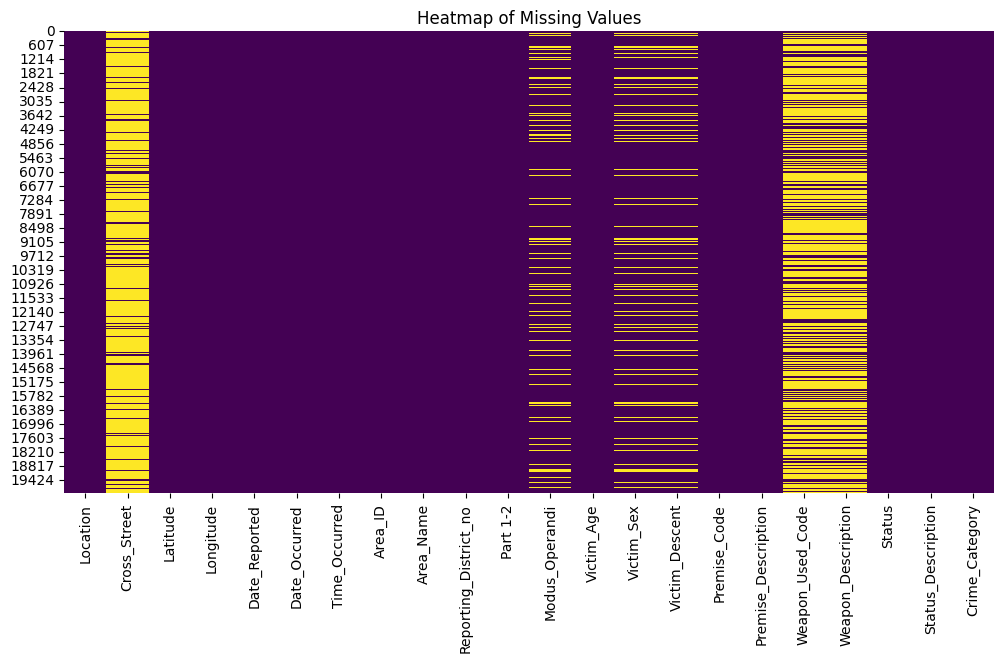

In [ ]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

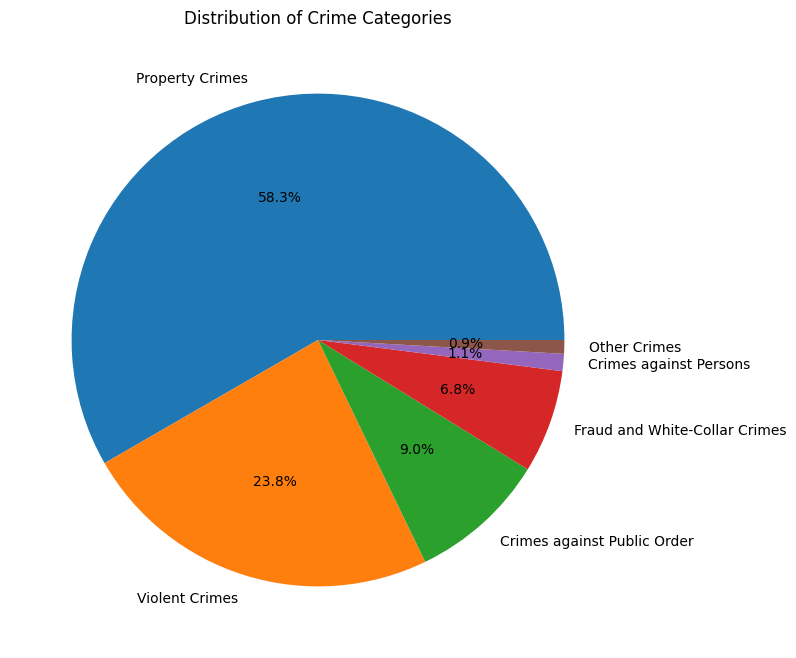

In [ ]:
plt.figure(figsize=(10, 8))
df['Crime_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Crime Categories')
plt.ylabel('')
plt.show()

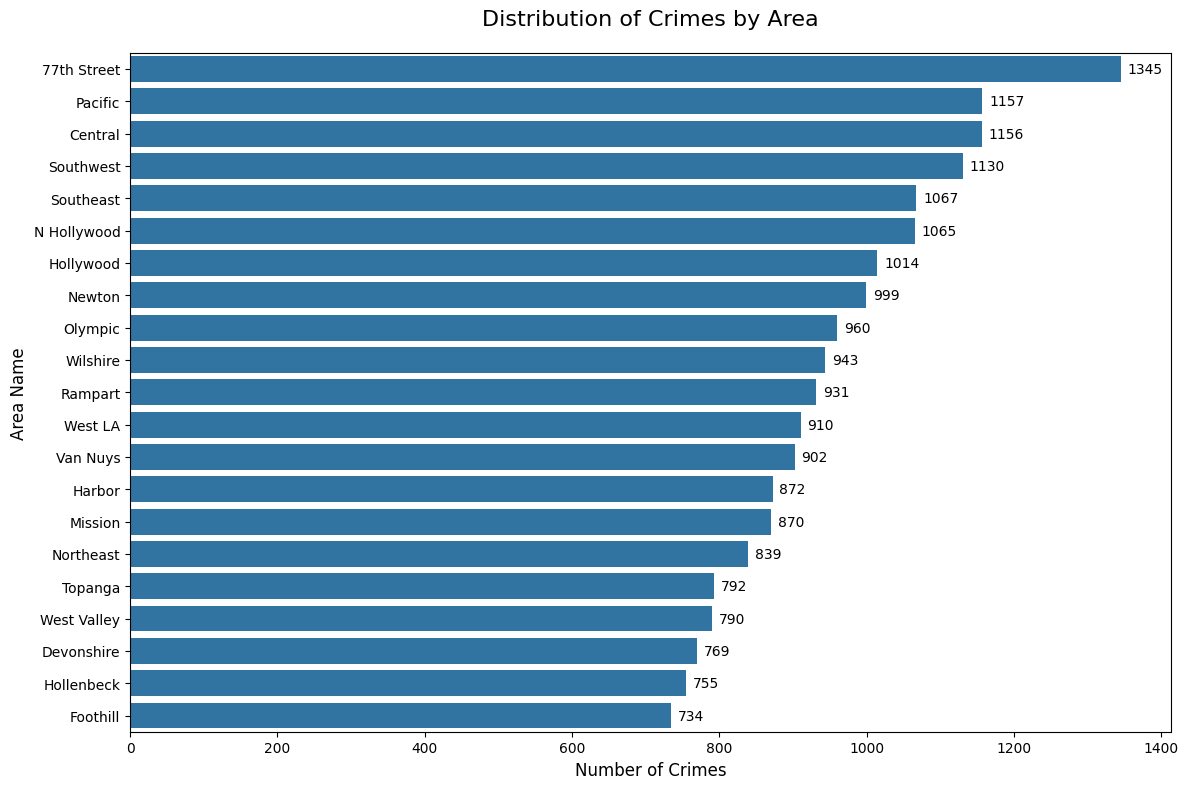

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y='Area_Name',
              data=df,
              order=df['Area_Name'].value_counts().index,
              ax=ax)

plt.title('Distribution of Crimes by Area', fontsize=16, pad=20)
ax.set_xlabel('Number of Crimes', fontsize=12)
ax.set_ylabel('Area Name', fontsize=12)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5)
plt.tight_layout()
plt.show()

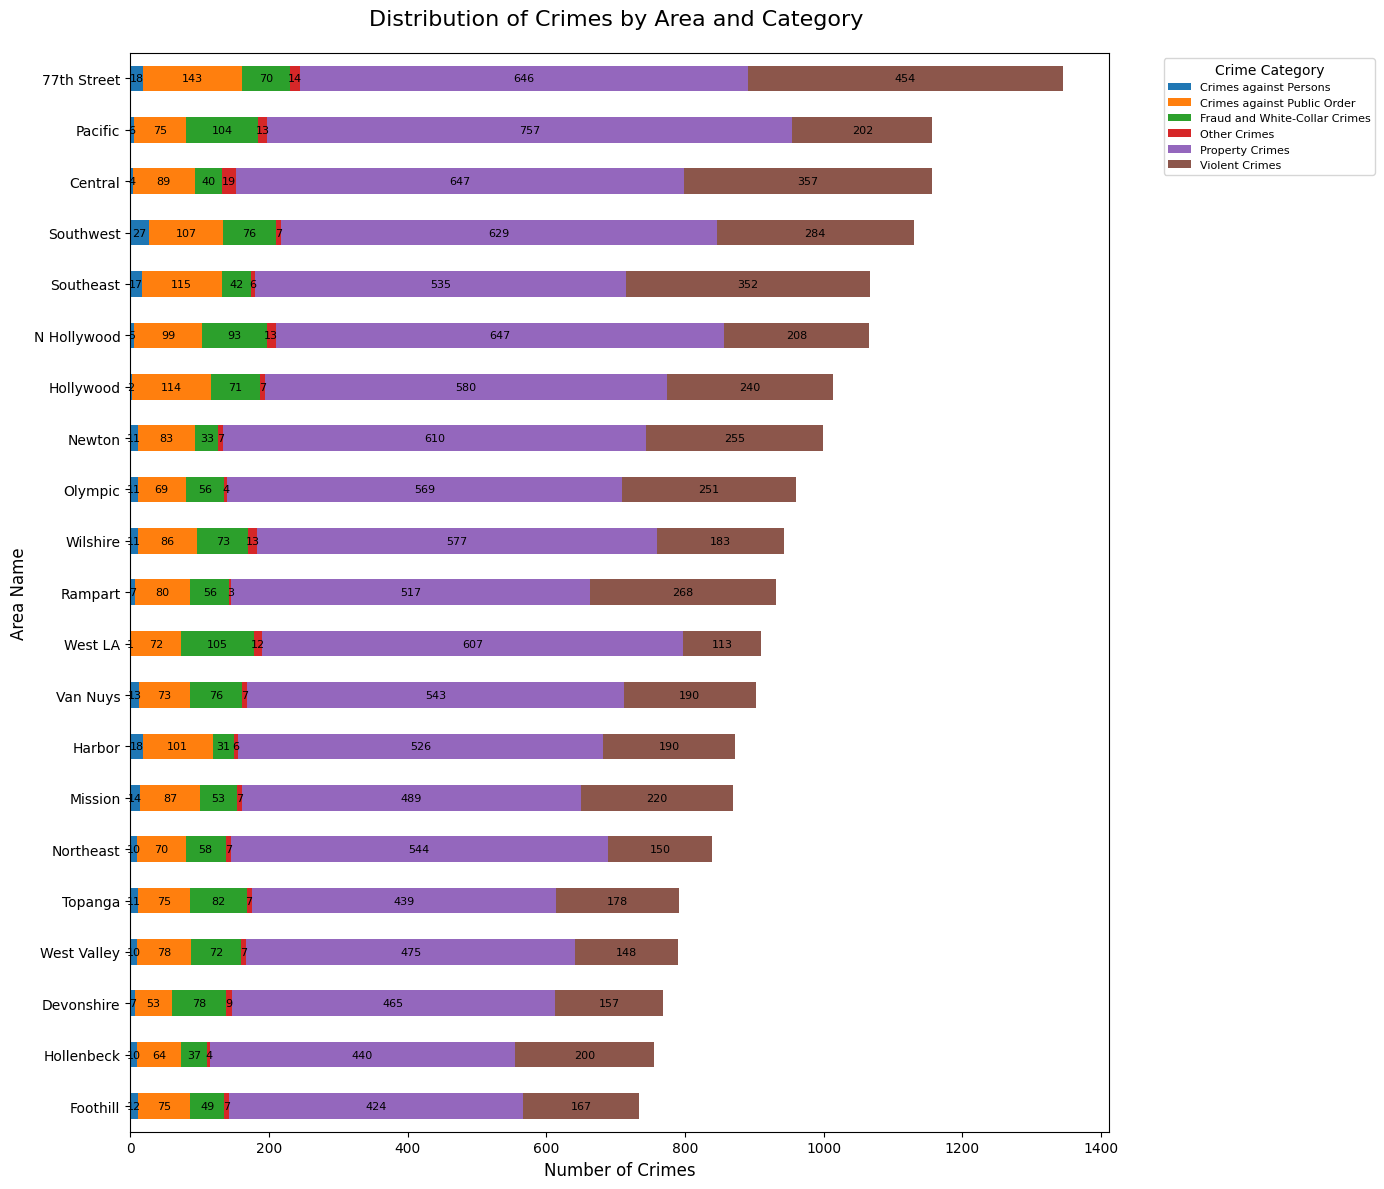

In [ ]:
crime_by_area = df.groupby(['Area_Name', 'Crime_Category']).size().unstack(fill_value=0)
crime_by_area['Total'] = crime_by_area.sum(axis=1)
crime_by_area = crime_by_area.sort_values(by='Total', ascending=True)
crime_by_area = crime_by_area.drop('Total', axis=1)

fig, ax = plt.subplots(figsize=(14, 12))
crime_by_area.plot(kind='barh', stacked=True, ax=ax)

plt.title('Distribution of Crimes by Area and Category ', fontsize=16, pad=20)
ax.set_xlabel('Number of Crimes', fontsize=12)
ax.set_ylabel('Area Name', fontsize=12)

# Adding labels
for c in ax.containers:
    labels = [f'{int(v.get_width())}' if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

#  legends
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

<Axes: xlabel='Victim_Sex', ylabel='Count'>

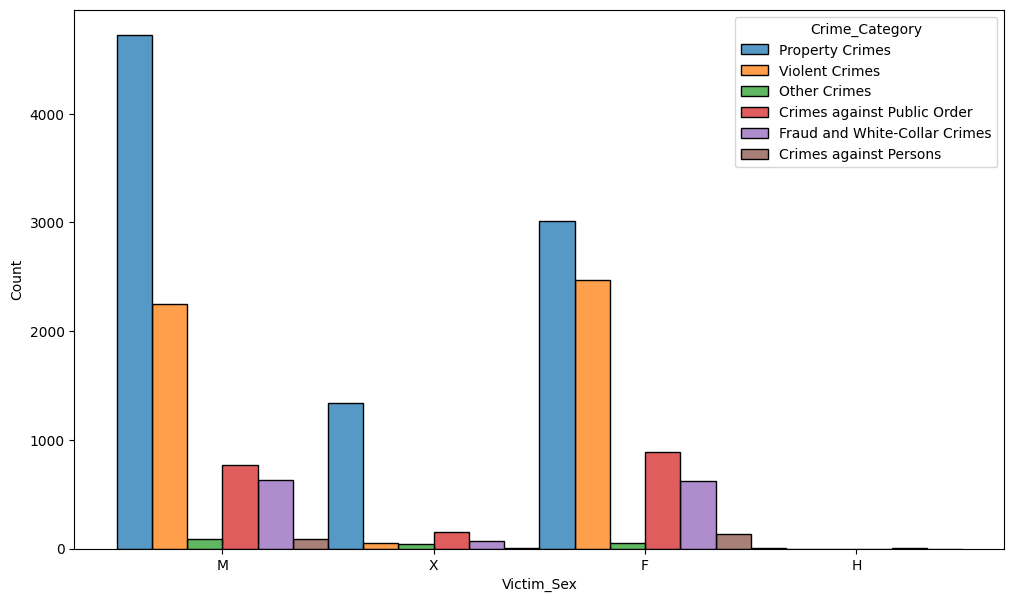

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(data=df,x='Victim_Sex', hue='Crime_Category', multiple='dodge')

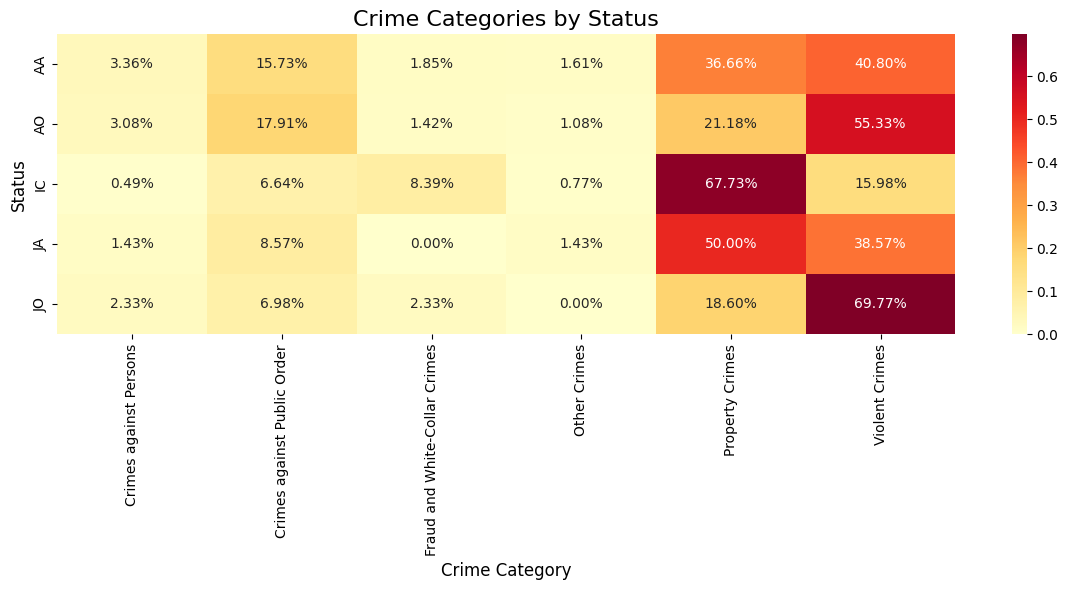

In [ ]:

plt.figure(figsize=(12, 6))
ct = pd.crosstab(df['Status'], df['Crime_Category'], normalize='index')
sns.heatmap(ct, annot=True, fmt='.2%', cmap='YlOrRd')

plt.title('Crime Categories by Status', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Status', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [ ]:
crime_cat = ['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons']
crime_cat_dict = {crime: i for i, crime in enumerate(crime_cat)}

# Mapping crime categories to their corresponding numbers
df['Crime_Category'] = df['Crime_Category'].apply(lambda crime: crime_cat_dict.get(crime))

# To map numbers back to names
# df['Crime_Category'] = df['Crime_Category'].apply(lambda num: crime_cat[num])


In [ ]:
df["Part 1-2"].unique()

array([1., 2.])

In [ ]:
df_temp = df[['Latitude', 'Longitude', 'Part 1-2',
       'Victim_Age', 'Street_Crossed',
       'Victim_Present', 'Day_Diff', 'Day_Occurred',
        'Month','Crime_Category']]
df2 = df_temp.corr()

#df2
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df2,cmap ="viridis", annot=True)

KeyError: "['Street_Crossed', 'Victim_Present', 'Day_Diff', 'Day_Occurred', 'Month'] not in index"

In [ ]:
df.columns

Text(0, 0.5, 'Count')

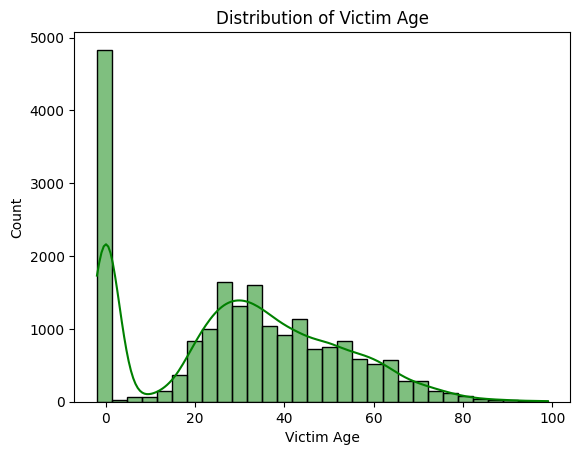

In [ ]:
# Distribution of victim age
sns.histplot(df['Victim_Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')

<ipython-input-289-a5a571aa032a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Victim_Descent',


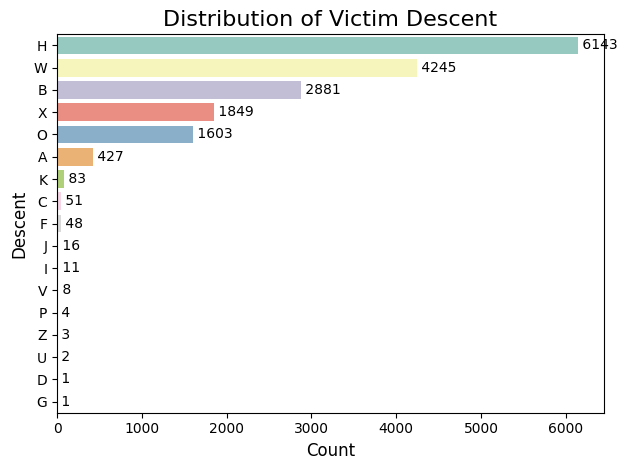

In [ ]:
sns.countplot(y='Victim_Descent',
              data=df,
              order=df['Victim_Descent'].value_counts().index,
              palette='Set3')

plt.title('Distribution of Victim Descent', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Descent', fontsize=12)

# Adding count labels to the end of each bar
for i, v in enumerate(df['Victim_Descent'].value_counts()):
    plt.text(v, i, f' {v}', va='center')
plt.tight_layout()
plt.show()

**Observation**
 -  Property crimes constitute the majority of reported incidents, followed by violent crimes and other categories.

 -The 77th Street area emerges as the hotspot for criminal activity, closely followed by the Pacific area.

 - Interestingly, while the Pacific area leads in property crime occurrences, the 77th Street area shows the highest incidence of violent crimes.

 - The distribution of victim ages displays a right-skewed pattern, with a concentration in the 20-40 year age range.

 - The data shows varied distributions across different descent categories of victims.


- Crimes are fairly evenly distributed across the months, with a slight increase in some months.


#Preproccessing

In [ ]:
df

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,0
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,0
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,0
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,0
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,0
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,0
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,3


In [ ]:
df.drop_duplicates(inplace=True)
df = df.replace({None: np.nan})
df = df.replace({"": np.nan})

df.fillna(value=0, inplace=True)

df['Victim_Age'] = df['Victim_Age'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df['Victim_Age'].fillna(df['Victim_Age'].median(), inplace=True)
df['Victim_Present'] = df['Victim_Age'].apply(lambda x : 0 if x <= 0 else 1)

df['Street_Crossed'] = df['Cross_Street'].apply(lambda x : 0 if x == 0 else 1)

df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

In [ ]:
# Extracting the hour, day, month, and year from Date_Occurred
df['Day_Occurred'] = (pd.to_datetime(df['Date_Occurred'])).dt.day
df['WeekDay_Occurred'] = (pd.to_datetime(df['Date_Occurred'])).dt.weekday
df['Month'] = (pd.to_datetime(df['Date_Occurred'])).dt.month
df['Day_Rep'] = (pd.to_datetime(df['Date_Reported'])).dt.day


df['DayOfYear'] = (pd.to_datetime(df['Date_Occurred'])).dt.dayofyear

# Calculating the time difference between Date_Reported and Date_Occurred
df['Day_Diff'] = (pd.to_datetime(df['Date_Reported']) - pd.to_datetime(df['Date_Occurred'])).dt.days  # Difference in hours


<ipython-input-292-c8f52e47a8f5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day_Occurred'] = (pd.to_datetime(df['Date_Occurred'])).dt.day
<ipython-input-292-c8f52e47a8f5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['WeekDay_Occurred'] = (pd.to_datetime(df['Date_Occurred'])).dt.weekday
<ipython-input-292-c8f52e47a8f5>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = (pd.to_datetime(df['Date_Occurred'])).dt.month
<ipython-input-292-c8f52e47a8f5>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to

In [ ]:
df['Part 1-2'] = df['Part 1-2'].astype(int)
df['Part 1-2'] = df['Part 1-2'].apply(lambda x: 0 if x == 1 else 1)
df['P_Code'] = df['Premise_Code'].apply(lambda x: int(x/10))

In [ ]:
df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Crime_Category,Victim_Present,Street_Crossed,Day_Occurred,WeekDay_Occurred,Month,Day_Rep,DayOfYear,Day_Diff,P_Code
0,4500 CARPENTER AV,0,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,0,1,0,6,4,3,9,66,3,10
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,0,1,1,27,3,2,27,58,0,21
2,600 E MARTIN LUTHER KING JR BL,0,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,0,1,0,21,4,8,21,234,0,50
3,14900 ORO GRANDE ST,0,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,0,1,0,6,4,11,8,311,2,10
4,7100 S VERMONT AV,0,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0,0,0,25,1,2,25,56,0,40


In [ ]:
df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category', 'Victim_Present',
       'Street_Crossed', 'Day_Occurred', 'WeekDay_Occurred', 'Month',
       'Day_Rep', 'DayOfYear', 'Day_Diff', 'P_Code'],
      dtype='object')

In [ ]:
df

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Crime_Category,Victim_Present,Street_Crossed,Day_Occurred,WeekDay_Occurred,Month,Day_Rep,DayOfYear,Day_Diff,P_Code
0,4500 CARPENTER AV,0,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,0,1,0,6,4,3,9,66,3,10
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,0,1,1,27,3,2,27,58,0,21
2,600 E MARTIN LUTHER KING JR BL,0,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,0,1,0,21,4,8,21,234,0,50
3,14900 ORO GRANDE ST,0,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,0,1,0,6,4,11,8,311,2,10
4,7100 S VERMONT AV,0,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0,0,0,25,1,2,25,56,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,0,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,1,1,0,24,6,5,24,145,0,50
19996,16900 ROSCOE BL,0,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0,0,0,25,4,12,25,360,0,30
19997,1000 S SHENANDOAH ST,0,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,0,1,0,25,4,9,25,269,0,10
19998,300 W SEPULVEDA ST,0,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,3,1,0,10,2,6,10,162,0,50


In [ ]:
redudant_coln = ['Location','Area_Name','Premise_Description',
                'Date_Reported','Status_Description', 'Date_Occurred', 'Cross_Street',
                'Weapon_Description','Time_Occurred']


In [ ]:
df = df.drop(redudant_coln, axis =1)

In [ ]:
df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,Crime_Category,Victim_Present,Street_Crossed,Day_Occurred,WeekDay_Occurred,Month,Day_Rep,DayOfYear,Day_Diff,P_Code
0,34.1522,-118.3910,15.0,1563.0,0,0385,75.0,M,W,101.0,...,0,1,0,6,4,3,9,66,3,10
1,34.0028,-118.2391,13.0,1367.0,0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,...,0,1,1,27,3,2,27,58,0,21
2,34.0111,-118.2653,13.0,1343.0,1,0329 1202,67.0,M,B,501.0,...,0,1,0,21,4,8,21,234,0,50
3,34.2953,-118.4590,19.0,1924.0,0,0329 1300,61.0,M,H,101.0,...,0,1,0,6,4,11,8,311,2,10
4,33.9787,-118.2918,12.0,1245.0,0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,...,0,0,0,25,1,2,25,56,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,3.0,303.0,1,0416 0446 2004 0913,51.0,M,H,501.0,...,1,1,0,24,6,5,24,145,0,50
19996,34.2212,-118.5011,10.0,1008.0,0,1822 0209 0344 1414 1420,0.0,M,W,301.0,...,0,0,0,25,4,12,25,360,0,30
19997,34.0571,-118.3815,8.0,849.0,0,0344 1822 1420,42.0,M,H,102.0,...,0,1,0,25,4,9,25,269,0,10
19998,33.7451,-118.2835,5.0,558.0,1,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,...,3,1,0,10,2,6,10,162,0,50


In [ ]:
#Converting the categorical data
cat_cols = ['Victim_Sex', 'Victim_Descent','Status']

df_temp = df[cat_cols]
dummies = pd.get_dummies(df_temp, columns=cat_cols, dtype="int8")
df_ = pd.concat([df, dummies], axis='columns')
# drop the values
df = df_.drop(cat_cols, axis='columns')

In [ ]:
df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Premise_Code,Weapon_Used_Code,Crime_Category,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,34.1522,-118.3910,15.0,1563.0,0,0385,75.0,101.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
1,34.0028,-118.2391,13.0,1367.0,0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,216.0,400.0,0,...,0,0,0,0,0,0,0,1,0,0
2,34.0111,-118.2653,13.0,1343.0,1,0329 1202,67.0,501.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,34.2953,-118.4590,19.0,1924.0,0,0329 1300,61.0,101.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
4,33.9787,-118.2918,12.0,1245.0,0,0416 0945 1822 0400 0417 0344,0.0,401.0,400.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,3.0,303.0,1,0416 0446 2004 0913,51.0,501.0,400.0,1,...,0,0,0,0,0,0,0,1,0,0
19996,34.2212,-118.5011,10.0,1008.0,0,1822 0209 0344 1414 1420,0.0,301.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
19997,34.0571,-118.3815,8.0,849.0,0,0344 1822 1420,42.0,102.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
19998,33.7451,-118.2835,5.0,558.0,1,1202 2038 0913 0602 1242 0553,76.0,501.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19909 entries, 0 to 19999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               19909 non-null  float64
 1   Longitude              19909 non-null  float64
 2   Area_ID                19909 non-null  float64
 3   Reporting_District_no  19909 non-null  float64
 4   Part 1-2               19909 non-null  int64  
 5   Modus_Operandi         19909 non-null  object 
 6   Victim_Age             19909 non-null  float64
 7   Premise_Code           19909 non-null  float64
 8   Weapon_Used_Code       19909 non-null  float64
 9   Crime_Category         19909 non-null  int64  
 10  Victim_Present         19909 non-null  int64  
 11  Street_Crossed         19909 non-null  int64  
 12  Day_Occurred           19909 non-null  int32  
 13  WeekDay_Occurred       19909 non-null  int32  
 14  Month                  19909 non-null  int32  
 15  Day_Rep

In [ ]:
df.drop('Modus_Operandi', axis=1, inplace=True)

In [ ]:
df["Modus_Operandi"]

KeyError: 'Modus_Operandi'

In [ ]:
df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Crime_Category,Victim_Present,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,34.1522,-118.3910,15.0,1563.0,0,75.0,101.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,34.0028,-118.2391,13.0,1367.0,0,41.0,216.0,400.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34.0111,-118.2653,13.0,1343.0,1,67.0,501.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,34.2953,-118.4590,19.0,1924.0,0,61.0,101.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33.9787,-118.2918,12.0,1245.0,0,0.0,401.0,400.0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,3.0,303.0,1,51.0,501.0,400.0,1,1,...,0,0,0,0,0,0,0,1,0,0
19996,34.2212,-118.5011,10.0,1008.0,0,0.0,301.0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
19997,34.0571,-118.3815,8.0,849.0,0,42.0,102.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
19998,33.7451,-118.2835,5.0,558.0,1,76.0,501.0,0.0,3,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19909 entries, 0 to 19999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               19909 non-null  float64
 1   Longitude              19909 non-null  float64
 2   Area_ID                19909 non-null  float64
 3   Reporting_District_no  19909 non-null  float64
 4   Part 1-2               19909 non-null  int64  
 5   Victim_Age             19909 non-null  float64
 6   Premise_Code           19909 non-null  float64
 7   Weapon_Used_Code       19909 non-null  float64
 8   Crime_Category         0 non-null      object 
 9   Victim_Present         19909 non-null  int64  
 10  Street_Crossed         19909 non-null  int64  
 11  Day_Occurred           19909 non-null  int32  
 12  WeekDay_Occurred       19909 non-null  int32  
 13  Month                  19909 non-null  int32  
 14  Day_Rep                19909 non-null  int32  
 15  DayOfYe

In [ ]:
numeric_cols = ['Area_ID','Latitude', 'Longitude','Victim_Age', 'DayOfYear','Day_Diff','Reporting_District_no',
               'Premise_Code','Weapon_Used_Code','Day_Occurred','Day_Rep', 'P_Code','WeekDay_Occurred','Month']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Scale the numeric columns only
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.shape

(19909, 46)

In [ ]:
df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Crime_Category,Victim_Present,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,0.716793,0.540369,0.70,0.697519,0,0.757576,0.000000,0.000000,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0.476252,0.841698,0.60,0.604008,0,0.414141,0.132488,0.776699,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.489615,0.789724,0.60,0.592557,1,0.676768,0.460829,0.000000,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.947190,0.405475,0.90,0.869752,0,0.616162,0.000000,0.000000,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.437450,0.737155,0.55,0.545802,0,0.000000,0.345622,0.776699,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.525519,0.617139,0.10,0.096374,1,0.515152,0.460829,0.776699,1,1,...,0,0,0,0,0,0,0,1,0,0
19996,0.827886,0.321960,0.45,0.432729,0,0.000000,0.230415,0.000000,0,0,...,0,0,1,0,0,0,0,1,0,0
19997,0.563677,0.559214,0.35,0.356870,0,0.424242,0.001152,0.000000,0,1,...,0,0,0,0,0,0,0,1,0,0
19998,0.061343,0.753620,0.20,0.218034,1,0.767677,0.460829,0.000000,3,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [ ]:

X = df.drop(columns=['Crime_Category'])
y = df['Crime_Category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




'\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [ ]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print the model name and results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Model: Logistic Regression
Accuracy: 0.7917
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3464
           1       0.74      0.84      0.79      1475
           2       0.00      0.00      0.00        51
           3       0.54      0.16      0.25       535
           4       0.61      0.75      0.68       397
           5       0.92      0.22      0.35        51

    accuracy                           0.79      5973
   macro avg       0.61      0.48      0.49      5973
weighted avg       0.77      0.79      0.77      5973



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
Accuracy: 0.8569
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3464
           1       0.81      0.91      0.86      1475
           2       0.50      0.04      0.07        51
           3       0.75      0.50      0.60       535
           4       0.77      0.76      0.76       397
           5       0.79      0.43      0.56        51

    accuracy                           0.86      5973
   macro avg       0.75      0.59      0.63      5973
weighted avg       0.85      0.86      0.85      5973

Model: K-Nearest Neighbors
Accuracy: 0.7758
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3464
           1       0.73      0.80      0.77      1475
           2       0.17      0.02      0.04        51
           3       0.40      0.20      0.27       535
           4       0.63      0.51      0.57       397
    

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:44:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.8651
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3464
           1       0.84      0.90      0.87      1475
           2       0.50      0.08      0.14        51
           3       0.70      0.58      0.64       535
           4       0.77      0.79      0.78       397
           5       0.60      0.53      0.56        51

    accuracy                           0.87      5973
   macro avg       0.72      0.63      0.65      5973
weighted avg       0.86      0.87      0.86      5973



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/submission.csv")

In [ ]:
df.shape

(5000, 2)

In [ ]:
df

,Unnamed: 0,Crime_Category
0,0,Property Crimes
1,1,Property Crimes
2,2,Fraud and White-Collar Crimes
3,3,Property Crimes
4,4,Crimes against Public Order
...,...,...
4995,4995,Property Crimes
4996,4996,Property Crimes
4997,4997,Property Crimes
4998,4998,Violent Crimes


In [ ]:
# Rename columns
df = df.rename(columns={'Unnamed: 0': 'ID'})

# Drop duplicates and reset index
df = df[['Crime_Category']].reset_index(drop=True)

# Add ID column
df.insert(0, 'ID', range(1, len(df) + 1))

# Set ID column as the index
df = df.set_index('ID')

print(df)

                     Crime_Category
ID                                 
1                   Property Crimes
2                   Property Crimes
3     Fraud and White-Collar Crimes
4                   Property Crimes
5       Crimes against Public Order
...                             ...
4996                Property Crimes
4997                Property Crimes
4998                Property Crimes
4999                 Violent Crimes
5000                Property Crimes

[5000 rows x 1 columns]


In [ ]:
df.shape

(5000, 1)

In [ ]:
df.to_csv('submission.csv')